## Heatmap and Primary of Stock Market analysis 
We get the stock data of five companies and turn into (+-) points and make a heatmap.   

In [2]:
import quandl as qn
import pandas as pd
import numpy as np
import scipy 
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.callbacks import TensorBoard
from sliding_window import sliding_window  ## Defined functions ## 
from AutoEncoder import AutoEncoder
#from AutoEncoderMLP import AutoEncoderMLP
from outliers import outliers 
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

qn.ApiConfig.api_key = "HQV7bdPFvAn1QUxxkN5c"
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Using TensorFlow backend.


In [3]:
Data=[]
Companies=["EOD/GOOGL","EOD/FB","EOD/AAPL","EOD/AMZN","EOD/MSFT"]
InitDate="2012-05-20"
EndDate="2018-01-01"
data=qn.get("NASDAQOMX/COMP", start_date=InitDate, end_date=EndDate,collapse="daily", transformation='rdiff')
Data.append(data['Index Value'])
for company in Companies:
    data=qn.get(company, start_date=InitDate, end_date=EndDate,collapse="daily", transformation='rdiff')
    Data.append(data['Close'])

In [4]:
Length=len(Data[0])
Range=int(Length)
rf= pd.DataFrame(np.array(Data[0][:Range]),columns=["NASDAQOMX"])
rf["GOOGL"]=pd.DataFrame(np.array(Data[1][:Range]))
rf["FB"]=pd.DataFrame(np.array(Data[2][:Range]))
rf["AAPL"]=pd.DataFrame(np.array(Data[3][:Range]))
rf["AMZN"]=pd.DataFrame(np.array(Data[4][:Range]))
rf["MSFT"]=pd.DataFrame(np.array(Data[5][:Range]))

In [5]:
import seaborn as sns
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
print rf.corr()
rfCorr = rf.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(rfCorr,annot=True)

           NASDAQOMX     GOOGL        FB      AAPL      AMZN      MSFT
NASDAQOMX   1.000000  0.491661  0.441670  0.324143  0.587434  0.652939
GOOGL       0.491661  1.000000  0.302386  0.129063  0.411107  0.349815
FB          0.441670  0.302386  1.000000  0.130957  0.344465  0.241284
AAPL        0.324143  0.129063  0.130957  1.000000  0.161684  0.199756
AMZN        0.587434  0.411107  0.344465  0.161684  1.000000  0.402022
MSFT        0.652939  0.349815  0.241284  0.199756  0.402022  1.000000


## Turning rdiff into (+,-) values for all sets of companies 

In [6]:
Data[0][1]
spinData=[]
for i in range(len(Data)):
    spinD=[]
    for j in range(len(Data[i])):
        if Data[i][j] > 0:        
            spinD.append(1)
        else:
            spinD.append(-1)
    spinData.append(spinD)

In [7]:
Length=len(spinData[0])
Range=int(Length)
df= pd.DataFrame(np.array(spinData[0][:Range]),columns=["NASDAQOMX"])
df["GOOGL"]=pd.DataFrame(np.array(spinData[1][:Range]))
df["FB"]=pd.DataFrame(np.array(spinData[2][:Range]))
df["AAPL"]=pd.DataFrame(np.array(spinData[3][:Range]))
df["AMZN"]=pd.DataFrame(np.array(spinData[4][:Range]))
df["MSFT"]=pd.DataFrame(np.array(spinData[5][:Range]))

In [8]:
import seaborn as sns
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
print df.corr()
dfCorr = df.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dfCorr,annot=True)

           NASDAQOMX     GOOGL        FB      AAPL      AMZN      MSFT
NASDAQOMX   1.000000  0.461261  0.413136  0.414786  0.525139  0.449666
GOOGL       0.461261  1.000000  0.384984  0.259664  0.450458  0.310964
FB          0.413136  0.384984  1.000000  0.246746  0.383399  0.264070
AAPL        0.414786  0.259664  0.246746  1.000000  0.238315  0.248814
AMZN        0.525139  0.450458  0.383399  0.238315  1.000000  0.301003
MSFT        0.449666  0.310964  0.264070  0.248814  0.301003  1.000000


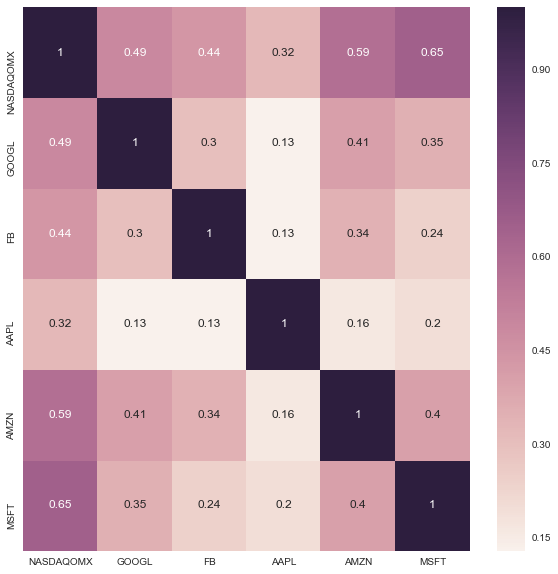

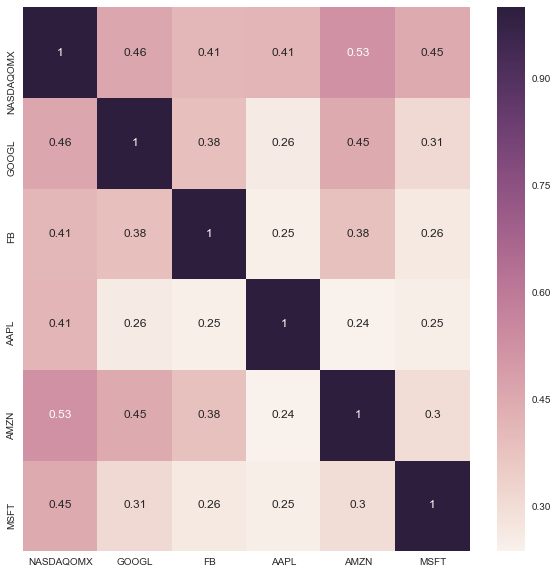

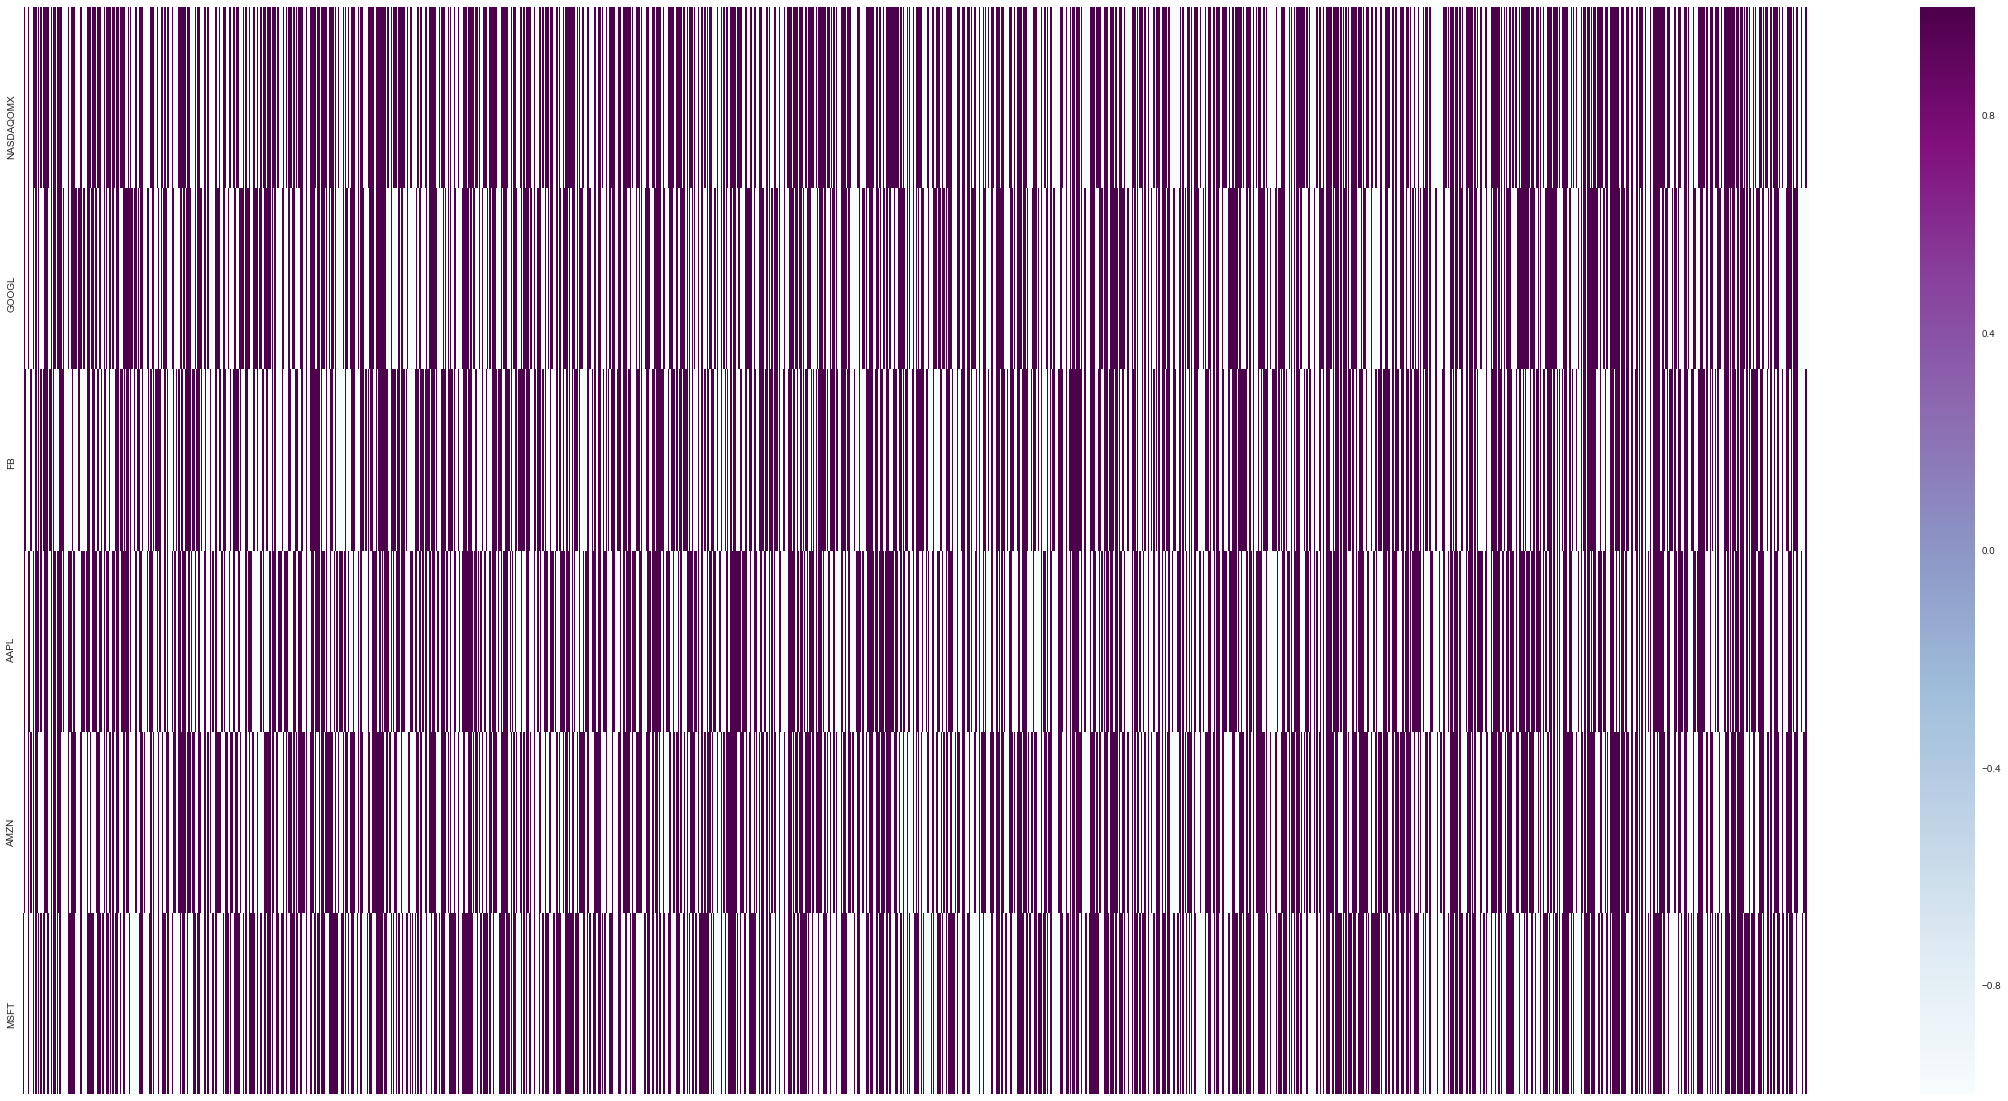

In [9]:
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(df.T,xticklabels=False, cmap="BuPu",)
plt.show()

In [10]:
contrastMap=rfCorr-dfCorr
# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(contrastMap,annot=True)

In [13]:
Length=len(spinData[0])
Range=int(0.2*Length)
cf= pd.DataFrame(np.array(spinData[0][:Range]),columns=["NASDAQOMX"])
cf["GOOGL"]=pd.DataFrame(np.array(spinData[1][:Range]))
cf["FB"]=pd.DataFrame(np.array(spinData[2][:Range]))
cf["AAPL"]=pd.DataFrame(np.array(spinData[3][:Range]))
cf["AMZN"]=pd.DataFrame(np.array(spinData[4][:Range]))
cf["MSFT"]=pd.DataFrame(np.array(spinData[5][:Range]))

In [14]:
import seaborn as sns
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
print cf.corr()
corr = cf.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

           NASDAQOMX     GOOGL        FB      AAPL      AMZN      MSFT
NASDAQOMX   1.000000  0.429222  0.300198  0.374840  0.498880  0.514432
GOOGL       0.429222  1.000000  0.213017  0.160150  0.370239  0.285982
FB          0.300198  0.213017  1.000000  0.067022  0.198704  0.083618
AAPL        0.374840  0.160150  0.067022  1.000000  0.120367  0.162301
AMZN        0.498880  0.370239  0.198704  0.120367  1.000000  0.304890
MSFT        0.514432  0.285982  0.083618  0.162301  0.304890  1.000000


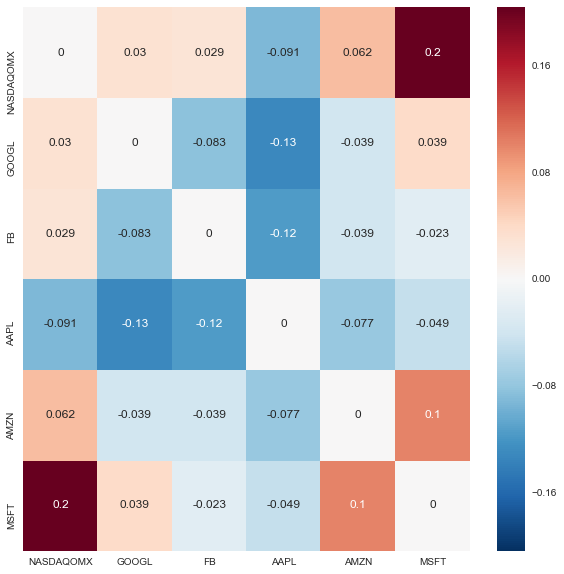

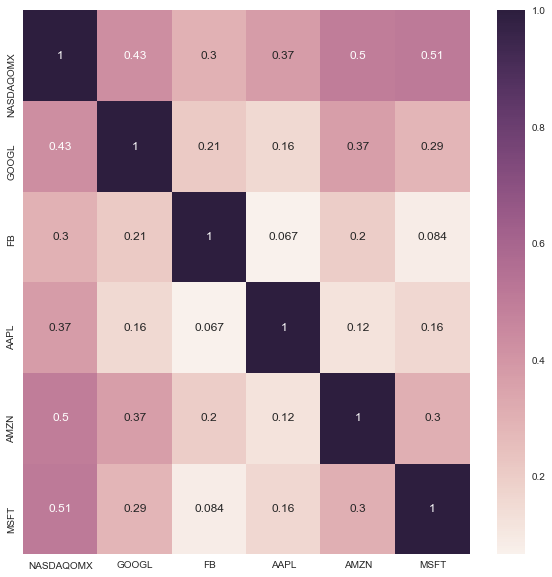

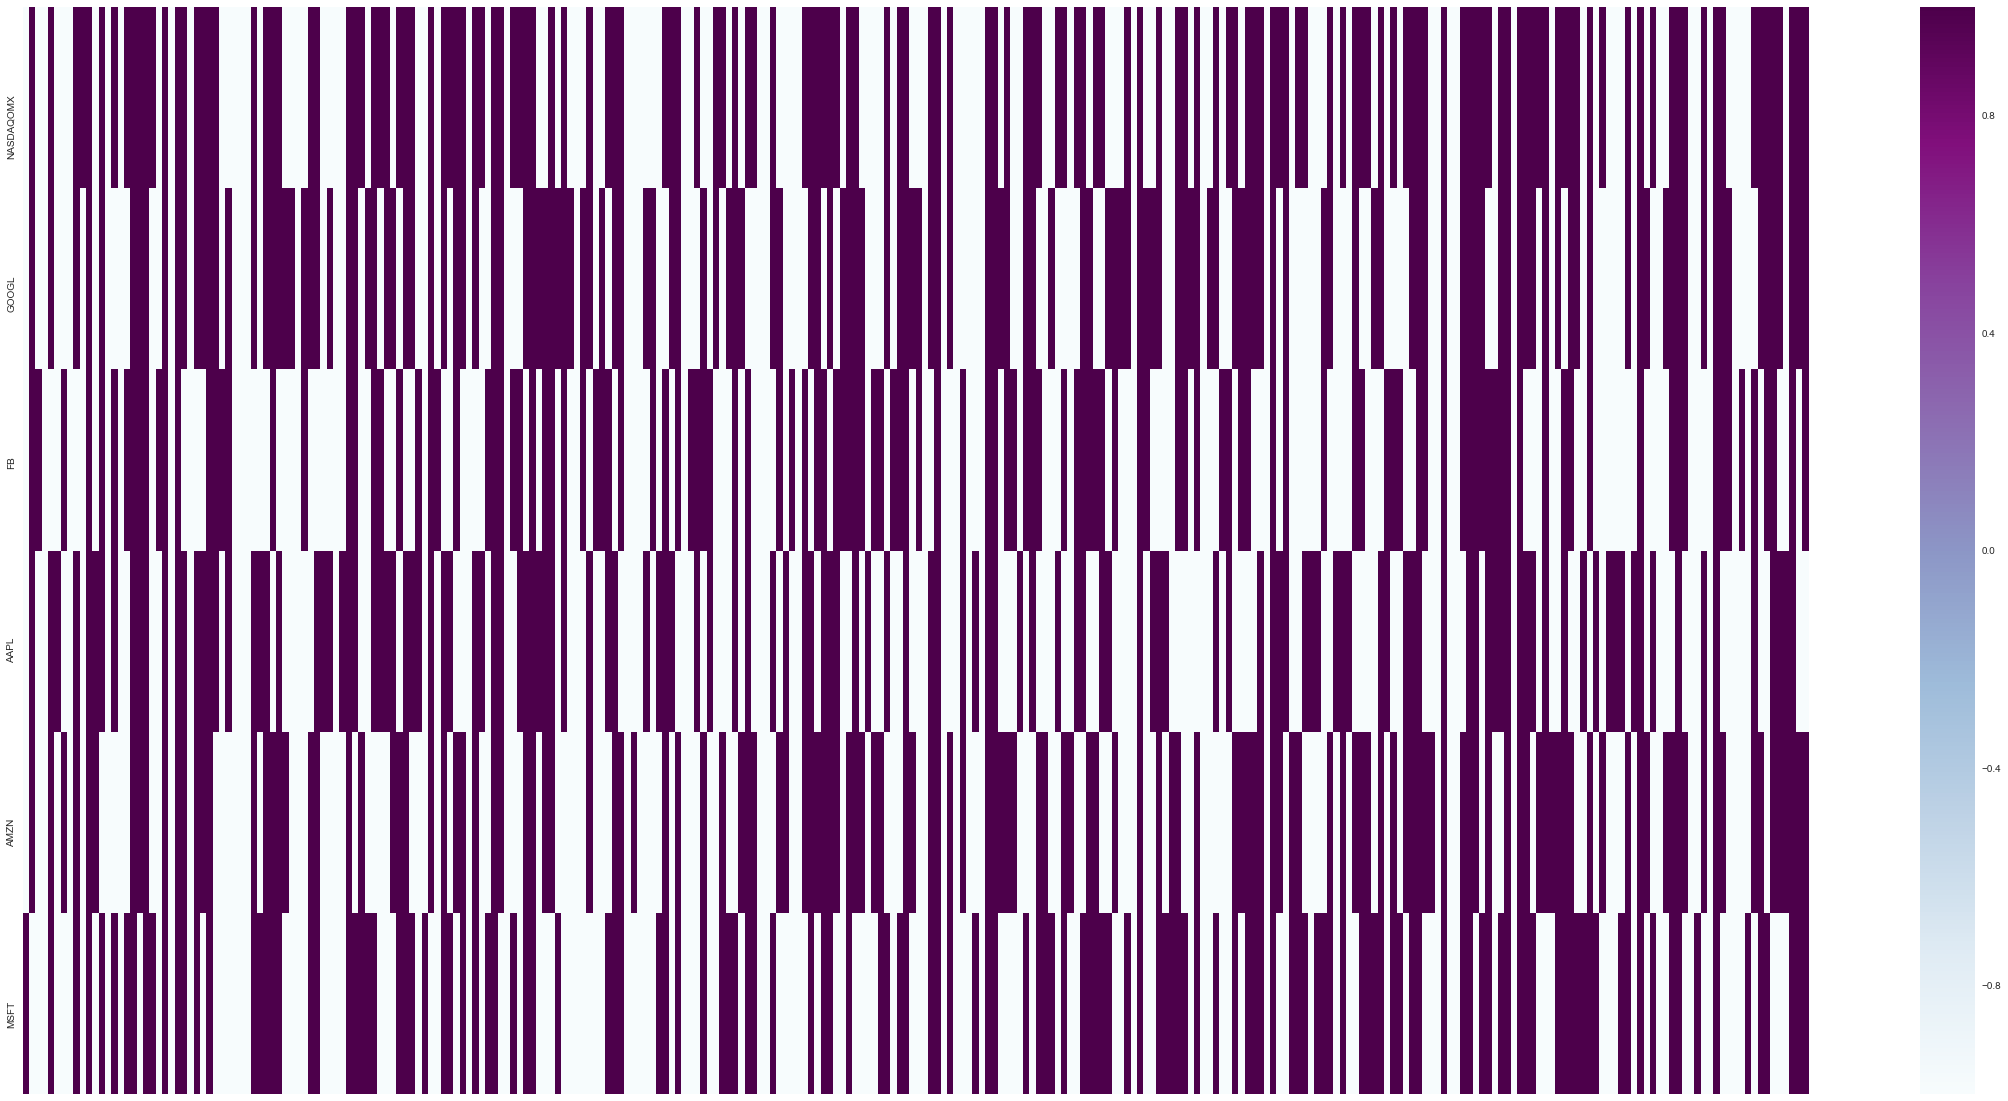

In [15]:
fig, ax = plt.subplots(figsize=(40,20))
sns.heatmap(cf.T,xticklabels=False, cmap="BuPu",)
plt.show()

In [16]:
import seaborn as sns
#sns.heatmap(df, cmap="YlGnBu")
#sns.heatmap(df, cmap="Blues")
#sns.heatmap(df, cmap="BuPu")
#sns.heatmap(df, cmap="Greens")
print cf.corr()
corr = cf.corr()

# plot the heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot=True)

           NASDAQOMX     GOOGL        FB      AAPL      AMZN      MSFT
NASDAQOMX   1.000000  0.429222  0.300198  0.374840  0.498880  0.514432
GOOGL       0.429222  1.000000  0.213017  0.160150  0.370239  0.285982
FB          0.300198  0.213017  1.000000  0.067022  0.198704  0.083618
AAPL        0.374840  0.160150  0.067022  1.000000  0.120367  0.162301
AMZN        0.498880  0.370239  0.198704  0.120367  1.000000  0.304890
MSFT        0.514432  0.285982  0.083618  0.162301  0.304890  1.000000


## Searching for unsupervised cluster over array spins 
    I transform the array to pockets of positive and negative spins: +++--++ -> 3+2-2+ then I search for freuency of pair of positive and negative ...  

In [ ]:
def pairFrequency(List):
    if List[0]==-1:
        

In [22]:
df["NASDAQOMX"]
1+2-1+3-1+3-8+7-.....
3+1-4+2-5+6-


0      -1
1       1
2      -1
3      -1
4       1
5      -1
6      -1
7      -1
8       1
9       1
10      1
11     -1
12      1
13     -1
14      1
15     -1
16      1
17      1
18      1
19      1
20      1
21     -1
22      1
23     -1
24      1
25      1
26     -1
27      1
28      1
29      1
       ..
1382    1
1383   -1
1384    1
1385    1
1386    1
1387    1
1388   -1
1389    1
1390   -1
1391    1
1392   -1
1393   -1
1394   -1
1395    1
1396    1
1397    1
1398    1
1399   -1
1400    1
1401   -1
1402    1
1403    1
1404   -1
1405   -1
1406    1
1407   -1
1408   -1
1409    1
1410    1
1411   -1
Name: NASDAQOMX, dtype: int64